In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv(r"C:\Users\gokul\Downloads\winequality_dataset_git.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df[['quality']]

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

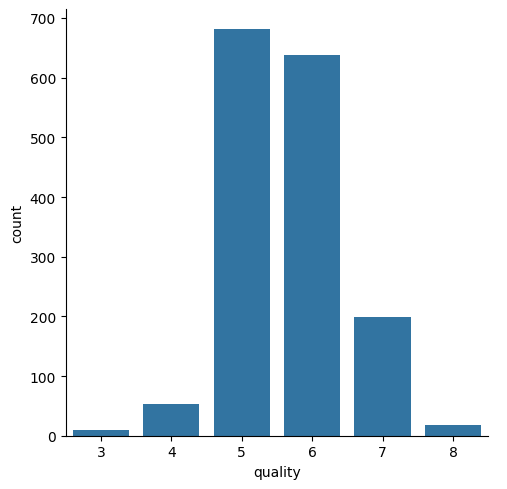

In [8]:
sns.catplot(x= 'quality', data = df, kind = 'count' )

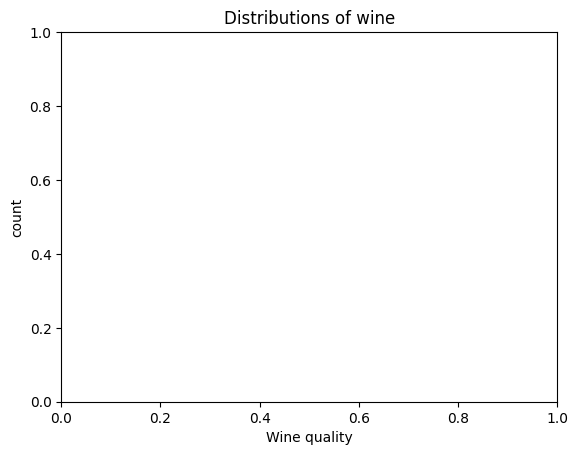

In [9]:
plt.xlabel('Wine quality')
plt.ylabel('count')
plt.title('Distributions of wine')
plt.show()

<Axes: xlabel='volatile acidity', ylabel='quality'>

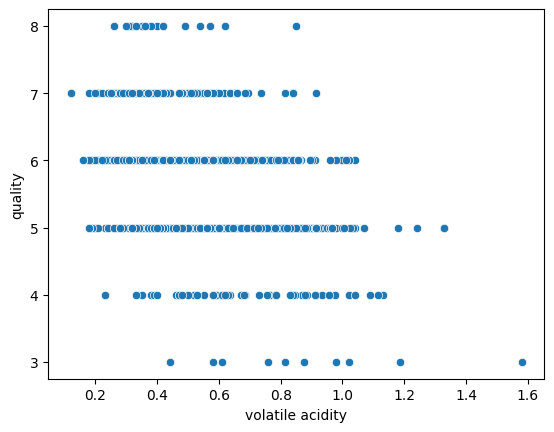

In [10]:
sns.scatterplot(x='volatile acidity', y='quality',data = df)

In [11]:
plt.xlabel

<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

C:\Users\gokul\AppData\Local\Temp\ipykernel_4280\3468980035.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'quality', y= 'density', data = df, ci = None )


<Axes: xlabel='quality', ylabel='density'>

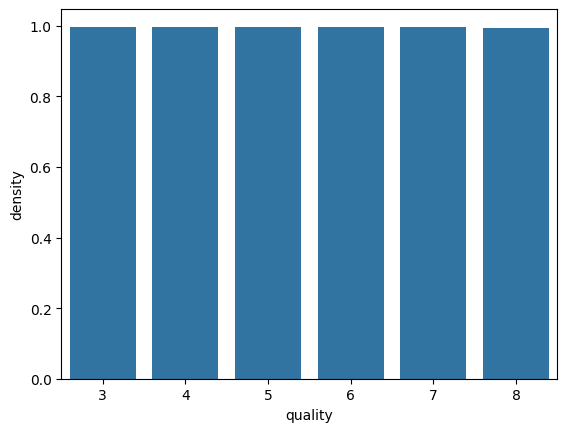

In [12]:
sns.barplot(x = 'quality', y= 'density', data = df, ci = None )

In [13]:
#coorection heatmap

In [14]:
correlation = df.corr()

In [15]:
# Set up the heatmap using Seaborn


Text(0.5, 1.0, 'Correlation Heatmap')

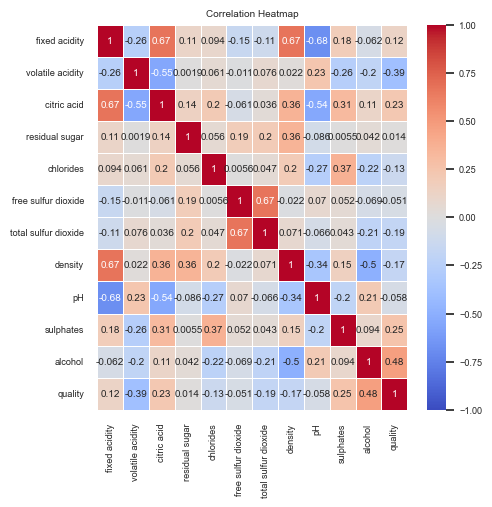

In [16]:
plt.figure(figsize=(5,5))
sns.set(font_scale=0.6)
sns.heatmap(data = correlation, annot= True, cmap ="coolwarm",linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Correlation Heatmap')

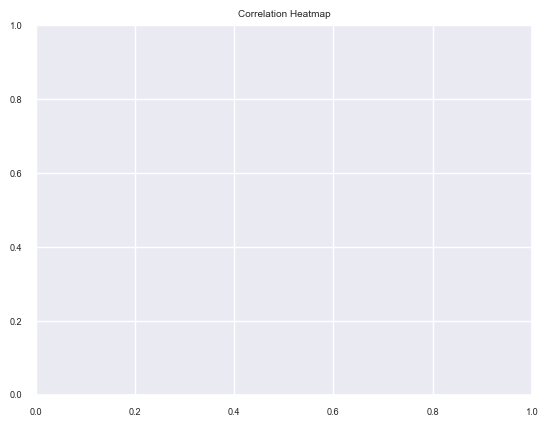

In [17]:
plt.title("Correlation Heatmap")

In [18]:
X = df.drop(columns = 'quality', axis = 1)

In [19]:
df['quality']  = df.quality.apply(lambda q : 'low' if q <= 5 else 'medium' if q <= 7 else 'high')

In [20]:
y = df['quality']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2 , random_state = 1 )

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [24]:
model = RandomForestClassifier()

In [25]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
RF_accuracy = model.score(X_train, y_train)

In [27]:
print(f'Train accuracy of RF Model : {RF_accuracy:.2f}')

Train accuracy of RF Model : 1.00


In [28]:
RF_accuracy_1 = model.score(X_test, y_test)

In [29]:
print(f'Test accuracy of RF Model : {RF_accuracy_1:.2f}')

Test accuracy of RF Model : 0.82


In [30]:
y_test_pred_RF = model.predict(X_test)

In [31]:
print(classification_report(y_test, y_test_pred_RF))

              precision    recall  f1-score   support

        high       1.00      0.50      0.67         2
         low       0.82      0.81      0.81       154
      medium       0.82      0.83      0.82       164

    accuracy                           0.82       320
   macro avg       0.88      0.71      0.77       320
weighted avg       0.82      0.82      0.82       320



In [32]:
#RF_accuracy_1 = model.score(y_test_pred_RF, y_test)
test_data_accuracy = accuracy_score(y_test_pred_RF, y_test)

In [33]:
test_data_accuracy

0.81875

In [34]:
model.predict([X_test.iloc[5]])

C:\Users\gokul\anaconda3\envs\work\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['medium'], dtype=object)

In [52]:
y_test.iloc[5]

'medium'

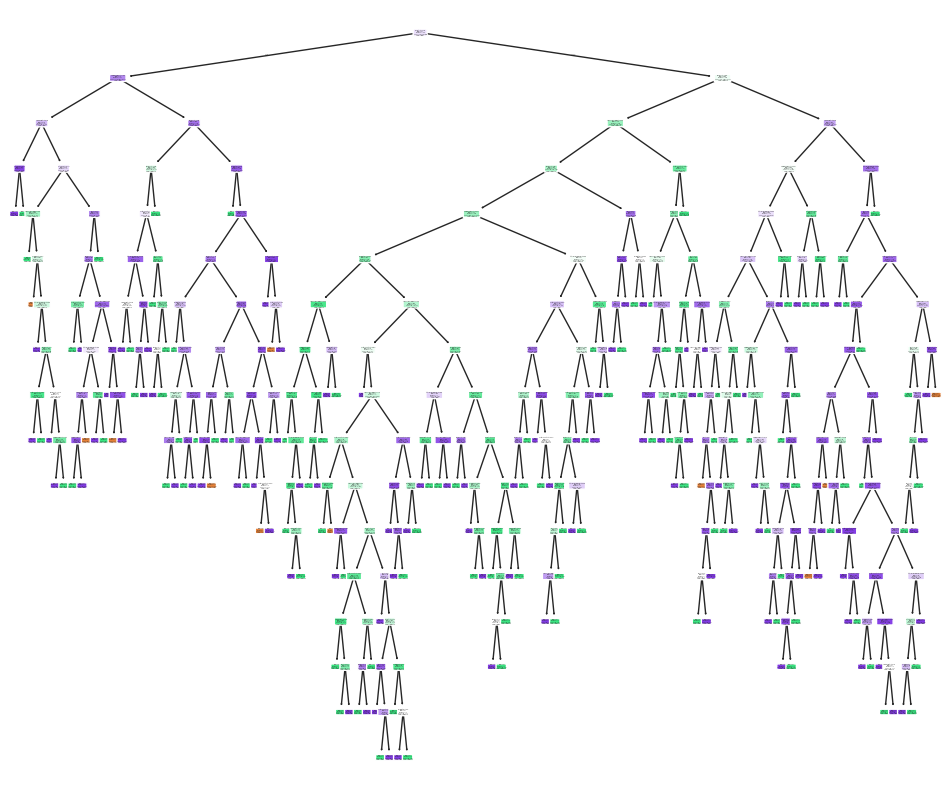

In [53]:
#RandomForest Plot
plt.figure(figsize=(12,10))
plot_tree(model.estimators_[1], filled = True, feature_names = X.columns, class_names=['Low', 'medium', 'high'], rounded=True)
plt.show()